# Week 5 - Aditya Sumbaraju
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

**Exercise 5.1:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic
import brfss
import thinkstats2
import thinkplot
import scipy.stats

In [87]:
## exercise 5-1
### percentage of the U.S. male population is in this range
mu = 178
sigma = 7.7
## scipy.stats.norm represents a normal distribution.
dist = scipy.stats.norm(loc=mu, scale=sigma)
low = dist.cdf(177.8)
high = dist.cdf(185.4)

In [88]:
## Identify percentage of the U.S. male population is in this range
low = dist.cdf(177.8)    # 5'10"
high = dist.cdf(185.4)   # 6'1"
high-low

0.3420946829459531

**Exercise 5.2:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [3]:
## Exercise 5-2
### Ploting the distribution
### Defining the parameters
alpha = 1.7
xmin = 1    
Distribution = scipy.stats.pareto(b=alpha, scale=xmin)
Distribution.median()


1.5034066538560549

In [4]:
### mean height in Pareto world
Distribution.mean()

2.428571428571429

In [91]:
### population is shorter than the mean
Distribution.cdf(Distribution.mean())

0.778739697565288

In [92]:
### People in the pareto world taller than 1km
np.round((1 - Distribution.cdf(1000)) * 7e9,0)

55603.0

In [93]:
### expected height of the tallest person
Distribution.ppf(1 - 1/7e9)

618349.6106759505

**Exercise 6-1** The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc2.py`, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under \$5000.” The highest range includes respondents who made “\$250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. `hinc2.py` provides `InterpolateSample`, which shows one way to model this data. It takes a `DataFrame` with a column, `income`, that contains the upper bound of each range, and `freq`, which contains the number of respondents in each frame.

It also takes `log_upper`, which is an assumed upper bound on the highest range, expressed in `log10` dollars. The default value, `log_upper=6.0` represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

`InterpolateSample` generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a `log10` scale.

<ipython-input-2-1f0ce7f65923>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
<ipython-input-2-1f0ce7f65923>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


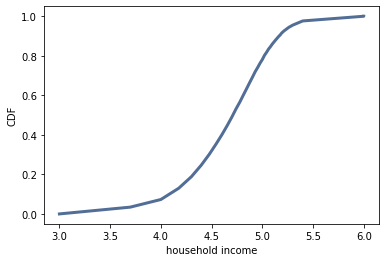

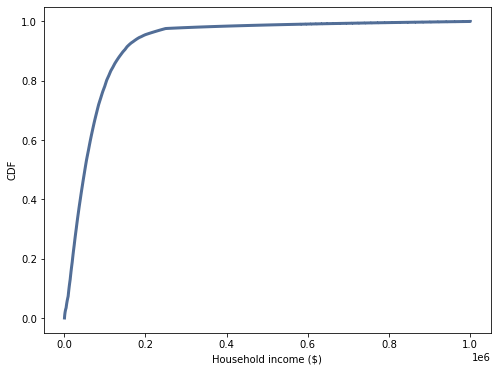

In [2]:
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import hinc
import numpy as np
import thinkplot
import thinkstats2

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


def main():
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample)
    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    sample = np.power(10, log_sample)
    cdf = thinkstats2.Cdf(sample)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

if __name__ == "__main__":
    main()




In [11]:
### loading data
income_df = hinc.ReadData()

In [13]:
import hinc
income_df = hinc.ReadData()
log_sample = InterpolateSample(income_df, log_upper=6.0)

<ipython-input-2-1f0ce7f65923>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
<ipython-input-2-1f0ce7f65923>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


In [14]:
income_df=income_df.drop([41])

In [15]:
income_df.head()

,income,freq,cumsum,ps,log_upper,log_lower
0,4999.0,4204,4204,0.034330,3.698883,3.000000
1,9999.0,4729,8933,0.072947,3.999957,3.698883
2,14999.0,6982,15915,0.129963,4.176062,3.999957
3,19999.0,7157,23072,0.188407,4.301008,4.176062
4,24999.0,7131,30203,0.246640,4.397923,4.301008


In [16]:
## calclulate mean for income
sample_inc = income_df['income']
sample_inc.mean()


106096.56097560975

In [17]:
## MEDIAN
sample_inc.median()

104999.0

In [18]:
## skewness
sample_inc.skew()

0.1686400785366617